In [1]:
from glob import glob
import json
import pandas as pd
import cufflinks as cf
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import statsmodels
import sqlite3
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
jsonFiles = [open(f).read() for f in glob('results-json/*')]

In [3]:
parsedFiles = [json.loads(jsonFile) for jsonFile in jsonFiles]

In [4]:
len(parsedFiles[0])

35

In [5]:
allData = {}
for fileData in parsedFiles:
    for bookData in fileData: 
        colorData = {itemDict['colorWord']: itemDict['nMatches'] for itemDict in bookData[0]['statsList']}
        allData[bookData[0]['textName']] = colorData                                        

In [6]:
df = pd.DataFrame(allData)

In [7]:
df = df.T.sort_index()

Make sure there is only one text per year. 

In [77]:
df.index

Index(['1880-DoraThorne-2374', '1880-GreeneFerneFarm-37046',
       '1880-JezebelsDaughter-3633', '1880-RoundAboutaGreatEstate-20528',
       '1880-ShakespearesInsomniaandtheCausesThereof-11990',
       '1880-StudiesinSongACenturyofRoundelsSonnetson-18782',
       '1880-TheDukesChildren-3622', '1880-TheKasîdahofHâjîAbdûElYezdî-6036',
       '1880-TheMillontheFloss-6688', '1880-TheTrumpetMajor-2864',
       ...
       '1922412-TheRustleofSilk-35079', '192251-MenofAffairs-23757',
       '1922710-AffairinAraby-10551', '1924-OurElizabethAHumourNovel-18430',
       '1925-StolenIdols-45636', '1925-TheVerseBookofaHomelyWoman-3477',
       '192511-ModernBritishPoetry-26785', '192711-OliverCromwellAPlay-17091',
       '1928-BrowningsShorterPoems-16376', '1928-TheBrotherofDaphne-748'],
      dtype='object', length=796)

In [8]:
df['date of publication'] = df.index.str.slice(0,4).astype(int)

In [9]:
byYear = df.groupby('date of publication').mean()

<AxesSubplot:xlabel='date of publication', ylabel='proportion of the color yellow'>

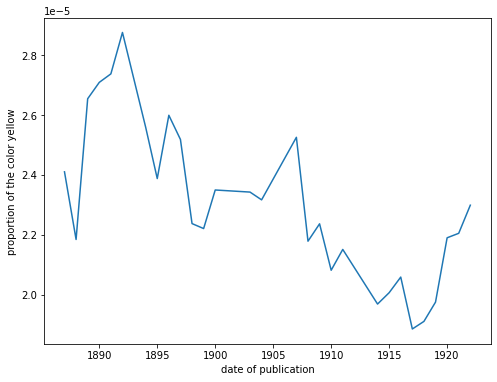

In [15]:
byYear['yellow'].rolling(8).mean().plot(ylabel='proportion of the color yellow', figsize=(8,6))

<AxesSubplot:xlabel='date of publication', ylabel='proportion of color words'>

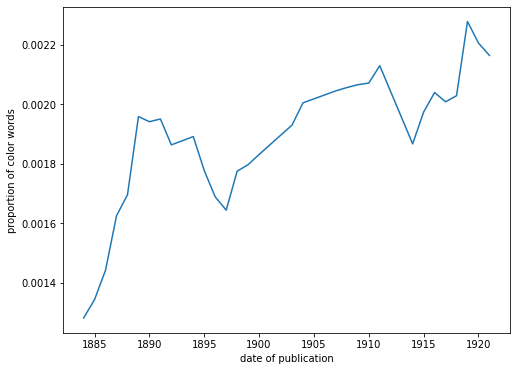

In [68]:
byYear[byYear.index < 1922].sum(axis=1).rolling(5).mean().plot(ylabel="proportion of color words", figsize=(8,6))

In [16]:
byYear

black               6.137781e-05
midnight            1.048145e-05
deep blue           3.295423e-06
mahogany            1.123051e-05
dark                5.889912e-05
                        ...     
nice blue           1.846132e-06
ultramarine blue    1.890320e-06
light salmon        1.890320e-06
sap green           1.159505e-06
light lavender      7.347317e-07
Length: 449, dtype: float64

<AxesSubplot:>

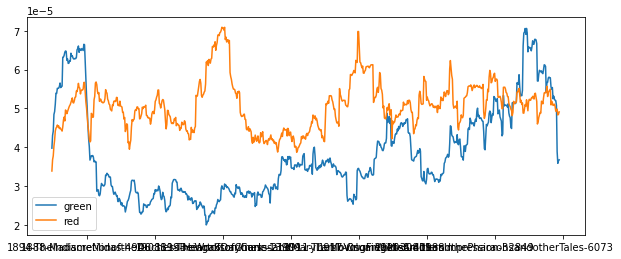

In [19]:
df.fillna(0)[['green', 'red']].rolling(50).mean().plot(figsize=(10, 4))

<AxesSubplot:>

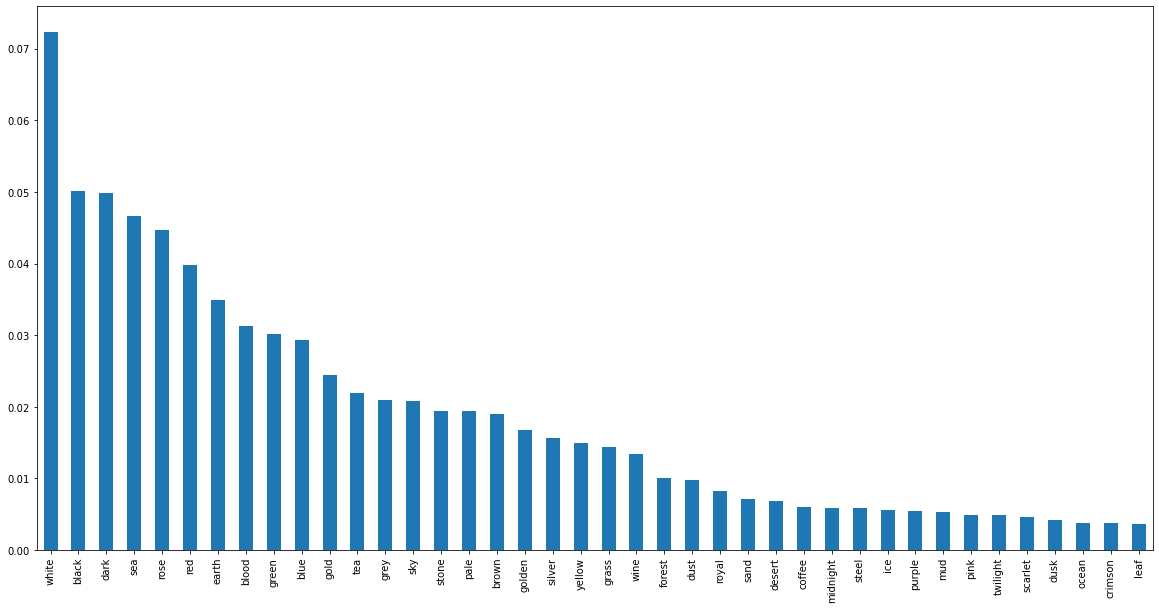

In [13]:
df.sum().sort_values(ascending=False)[:40].plot(kind='bar', figsize=(20, 10))

In [21]:
df.sum(axis=1).sort_values(ascending=False).head(10)

1911-TheInnofDreams-22736                             0.005390
1922-DownAdownDerryABookofFairyPoems-32091            0.004363
1919-Poems19161918-40344                              0.004233
19181111-TheNewMorningPoems-21029                     0.003954
1911-FortyTwoPoems-3039                               0.003637
191911-MiscellanyofPoetry1919-9652                    0.003590
1918-TheBoyWhoKnewWhatTheBirdsSaid-24493              0.003542
1903-TheNutsofKnowledgeLyricalPoemsOldandNew-16616    0.003494
191011-TheMahoganyTree-45921                          0.003266
1889630-TheAscentofMan-39844                          0.003251
dtype: float64

In [35]:
df['year']

1880-DoraThorne-2374                                  1880
1880-GreeneFerneFarm-37046                            1880
1880-JezebelsDaughter-3633                            1880
1880-RoundAboutaGreatEstate-20528                     1880
1880-ShakespearesInsomniaandtheCausesThereof-11990    1880
                                                      ... 
1925-TheVerseBookofaHomelyWoman-3477                  1925
192511-ModernBritishPoetry-26785                      1925
192711-OliverCromwellAPlay-17091                      1927
1928-BrowningsShorterPoems-16376                      1928
1928-TheBrotherofDaphne-748                           1928
Name: year, Length: 796, dtype: int64

In [72]:
yellowDF = df.fillna(0)[['yellow']]

In [58]:
yellowDF.index = df['year']

In [38]:
yellowDF.rolling(50).mean().plot()

NameError: name 'yellowDF' is not defined

In [73]:
yellowDF.sort_values(by='yellow', ascending=False)

,yellow
1896-ProseFanciesSecondSeries-14103,0.000397
1886-APhantomLover-8180,0.000264
1887-ATaleofThreeLions-2729,0.000190
1920-TheSongBookofQuongLeeofLimehouse-2161,0.000189
1889-LongOdds-2730,0.000181
...,...
1895-FrivolousCupid-428,0.000000
1916-ShakespeareandPreciousStonesTreatingoftheKn-16055,0.000000
1889-AllansWife-2727,0.000000
1917-OscarWildeAnIdlersImpression-32849,0.000000


Yellow nineties? 

In [55]:
fig = px.line(yellowDF, x='year', y='yellow')
#fig.show()
fig.write_html('yellow.html')

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['yellow'] but received: year

/nix/store/42gajlmxadiwvadjx49q9vpfqihrylpx-python3-3.8.6-env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



<AxesSubplot:>

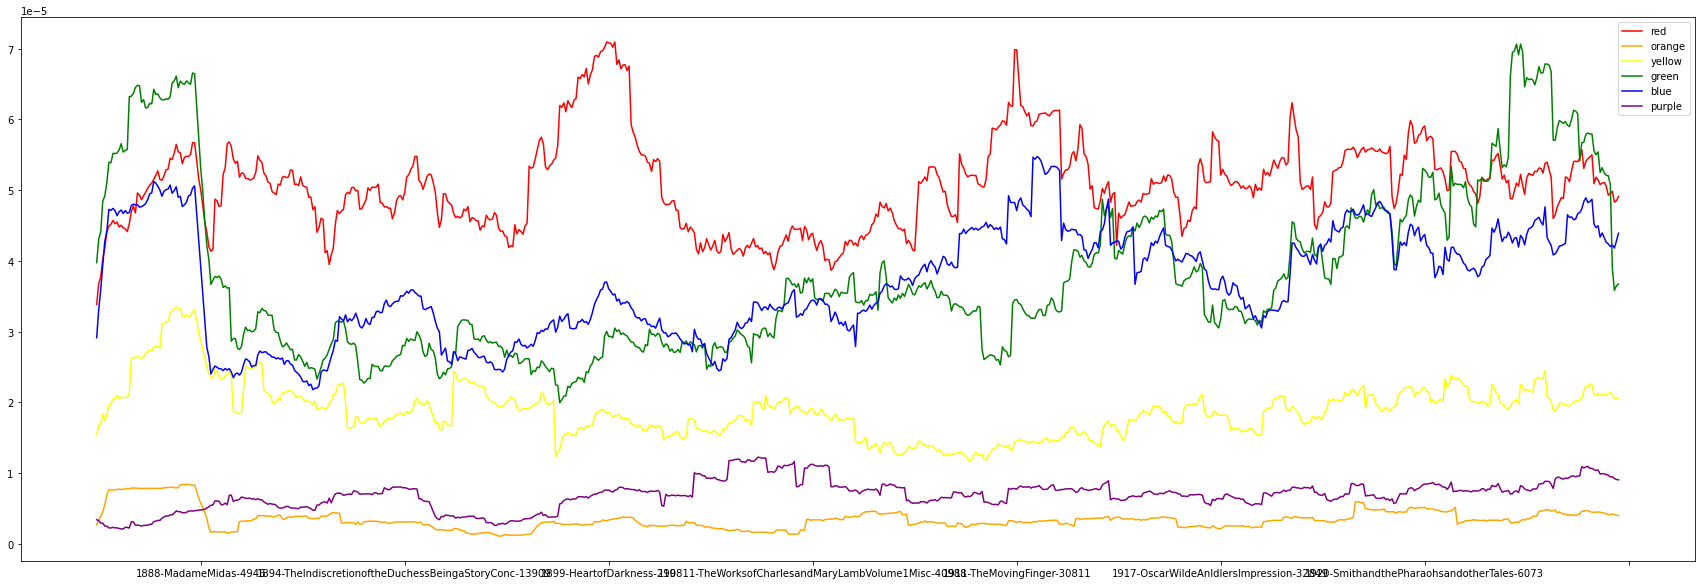

In [16]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
df.fillna(0)[colors].rolling(50).mean().plot(figsize=(30, 10), color=colors)

In [17]:
df['textName'] = df.index

In [18]:
dfMelted = df.melt(id_vars='textName')

In [19]:
dfMelted['year'] = dfMelted['textName'].apply(lambda x: int(x[:4]))

In [20]:
dfMelted

,textName,variable,value,year
0,1880-DoraThorne-2374,black,0.000012,1880
1,1880-GreeneFerneFarm-37046,black,0.000102,1880
2,1880-JezebelsDaughter-3633,black,0.000021,1880
3,1880-RoundAboutaGreatEstate-20528,black,0.000114,1880
4,1880-ShakespearesInsomniaandtheCausesThereof-1...,black,NaN,1880
...,...,...,...,...
357399,1925-TheVerseBookofaHomelyWoman-3477,macaroni and cheese,NaN,1925
357400,192511-ModernBritishPoetry-26785,macaroni and cheese,NaN,1925
357401,192711-OliverCromwellAPlay-17091,macaroni and cheese,NaN,1927
357402,1928-BrowningsShorterPoems-16376,macaroni and cheese,NaN,1928


In [21]:
fig = px.box(dfMelted, x="textName", y="value")
fig.write_html('out.html')

In [22]:
dfMelted

,textName,variable,value,year
0,1880-DoraThorne-2374,black,0.000012,1880
1,1880-GreeneFerneFarm-37046,black,0.000102,1880
2,1880-JezebelsDaughter-3633,black,0.000021,1880
3,1880-RoundAboutaGreatEstate-20528,black,0.000114,1880
4,1880-ShakespearesInsomniaandtheCausesThereof-1...,black,NaN,1880
...,...,...,...,...
357399,1925-TheVerseBookofaHomelyWoman-3477,macaroni and cheese,NaN,1925
357400,192511-ModernBritishPoetry-26785,macaroni and cheese,NaN,1925
357401,192711-OliverCromwellAPlay-17091,macaroni and cheese,NaN,1927
357402,1928-BrowningsShorterPoems-16376,macaroni and cheese,NaN,1928


In [23]:
df['id'] = df['textName'].apply(lambda x: x.split('-')[-1])

# Metadata Analysis

Which library of congress subject headings correlate with which colors? 

Which subject headings correlate with colorfulness? 

In [24]:
conn = sqlite3.connect('/home/jon/Corpora/pg-text-7.db')

In [25]:
c = conn.cursor()

In [26]:
c.fetchall()

[]

In [27]:
def getLCSH(bookId): 
    bookId = str(float(bookId))
    c.execute('select lcsh from meta where id=?;', [bookId])
    results = c.fetchall()
    return eval(results[0][0].replace('{', '[').replace('}', ']'))

In [28]:
df['lcsh'] = df['id'].apply(getLCSH)

In [29]:
df['id'] = df['textName'].apply(lambda x: x.split('-')[-1])

In [30]:
df['lcsh'] = df['id'].apply(getLCSH)

In [69]:
def guessGenre(lcshs): 
    for lcsh in lcshs: 
        lcsh = lcsh.lower()
        if 'children' in lcsh or 'juvenile' in lcsh or 'fairy' in lcsh or 'tales' in lcsh: 
            return 'Juvenile'
        if 'fantasy' in lcsh: 
            return 'Fantasy'
        elif 'drama' in lcsh or 'play' in lcsh: 
            return 'Drama'
        elif 'poetry' in lcsh or 'poems' in lcsh: 
            return 'Poetry'
        elif 'fiction' in lcsh: 
            return 'Fiction'
        

In [70]:
df['genre'] = df['lcsh'].apply(guessGenre)

In [71]:
df['totals'] = df.sum(axis=1)

<AxesSubplot:xlabel='genre'>

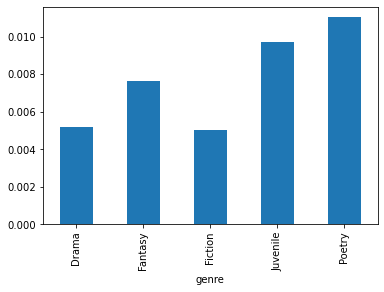

In [72]:
df.groupby('genre').mean()['totals'].plot(kind='bar')

In [73]:
df.loc['1918-TheBoyWhoKnewWhatTheBirdsSaid-24493']['lcsh']

['Fairy tales', 'Birds -- Fiction']

In [74]:
df.groupby('genre').sum()

,black,midnight,dark,blood,brown,crimson,dusk,violet,red,earth,...,light lavender,hot green,warm pink,pale magenta,violet pink,brownish purple,bluey green,algae,macaroni and cheese,totals
genre,,,,,,,,,,,,,,,,,,,,,
Drama,0.000987,0.000146,0.001353,0.001400,0.000125,0.000101,0.000010,0.000100,0.000841,0.001913,...,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.109309
Fantasy,0.002033,0.000247,0.001852,0.000868,0.000573,0.000063,0.000231,0.000044,0.001795,0.001663,...,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.175968
Fiction,0.035721,0.003863,0.033863,0.021063,0.012733,0.002433,0.002883,0.002313,0.024401,0.018954,...,7.347317e-07,0.000000,0.000002,0.000004,0.0,0.000002,0.000002,0.000002,0.000002,2.787332
Juvenile,0.002591,0.000253,0.002949,0.000972,0.001294,0.000282,0.000227,0.000052,0.003296,0.001039,...,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.272398
Poetry,0.003105,0.000559,0.004712,0.003668,0.001609,0.000382,0.000448,0.000314,0.005113,0.006648,...,0.000000e+00,0.000003,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.507300


In [75]:
def getAuthor(textName):
    textId = textName.split('-')[-1]
    c.execute('select author from meta where id=?', [str(float(textId))])
    return c.fetchone()[0]

In [76]:
for i, row in df.iterrows(): 
    bookId = i.split('-')[-1]
    author = getAuthor(bookId)
    df.loc[i, 'author'] = author

In [77]:
df[df['genre'] == 'Fiction'].sort_values('totals', ascending=False).head(10)

,black,midnight,dark,blood,brown,crimson,dusk,violet,red,earth,...,brownish purple,bluey green,algae,macaroni and cheese,textName,id,lcsh,genre,totals,author
192156-MondayorTuesday-29220,0.000136,0.000010,0.000039,0.000019,0.000078,0.000019,0.000019,0.000029,0.000213,0.000097,...,NaN,NaN,NaN,NaN,192156-MondayorTuesday-29220,29220,[England -- Social life and customs -- 20th ce...,Fiction,0.014653,"Woolf, Virginia"
1922-JacobsRoom-5670,0.000124,0.000019,0.000127,0.000013,0.000041,0.000006,0.000013,0.000010,0.000137,0.000057,...,NaN,NaN,NaN,NaN,1922-JacobsRoom-5670,5670,"[Psychological fiction, Experimental fiction, ...",Fiction,0.013585,"Woolf, Virginia"
1880-GreeneFerneFarm-37046,0.000102,NaN,0.000128,0.000053,0.000071,0.000031,0.000009,0.000009,0.000084,0.000093,...,NaN,NaN,NaN,NaN,1880-GreeneFerneFarm-37046,37046,"[Country life -- England -- Fiction, England -...",Fiction,0.011927,"Jefferies, Richard"
1922-CaptainBlood-1965,0.000076,0.000006,0.000030,0.001376,0.000008,0.000005,0.000006,0.000002,0.000036,0.000002,...,NaN,NaN,NaN,NaN,1922-CaptainBlood-1965,1965,"[Caribbean Area -- Fiction, British -- Caribbe...",Fiction,0.011748,"Sabatini, Rafael"
1898212-TheTragedyoftheKorosko-12555,0.000273,NaN,0.000081,0.000027,0.000223,0.000012,NaN,0.000038,0.000131,0.000027,...,NaN,NaN,NaN,NaN,1898212-TheTragedyoftheKorosko-12555,12555,"[East and West -- Fiction, Egypt -- Social lif...",Fiction,0.011683,"Doyle, Arthur Conan"
1895-TheSecondJungleBook-1937,0.000155,0.000012,0.000104,0.000135,0.000035,NaN,0.000003,NaN,0.000233,0.000078,...,NaN,NaN,NaN,NaN,1895-TheSecondJungleBook-1937,1937,"[Mowgli (Fictitious character) -- Fiction, Ind...",Fiction,0.011438,"Kipling, Rudyard"
1922-TheWindBloweth-21999,0.000154,0.000005,0.000114,0.000035,0.000063,NaN,0.000072,0.000002,0.000117,0.000033,...,NaN,NaN,NaN,NaN,1922-TheWindBloweth-21999,21999,[Fiction],Fiction,0.011421,"Byrne, Donn"
191911-MaryOlivieraLife-9366,0.000262,0.000002,0.000104,0.000029,0.000083,0.000005,0.000012,0.000014,0.000096,0.000043,...,NaN,NaN,NaN,NaN,191911-MaryOlivieraLife-9366,9366,"[Mothers and daughters -- Fiction, Bildungsrom...",Fiction,0.011415,"Sinclair, May"
1922-TheGardenPartyandOtherStories-1429,0.000172,NaN,0.000210,0.000003,0.000028,0.000016,0.000006,NaN,0.000091,0.000019,...,NaN,NaN,NaN,NaN,1922-TheGardenPartyandOtherStories-1429,1429,[New Zealand -- Social life and customs -- Fic...,Fiction,0.011394,"Mansfield, Katherine"
1919-LivingAlone-14907,0.000033,NaN,0.000046,0.000004,0.000918,NaN,0.000008,0.000012,0.000046,0.000037,...,NaN,NaN,NaN,NaN,1919-LivingAlone-14907,14907,"[World War, 1914-1918 -- Fiction, Witches -- F...",Fiction,0.011274,"Benson, Stella"


In [82]:
df[df['genre'] == 'Fiction'].groupby('author').mean().sort_values(by='totals', ascending=False).head(20)['totals']

author
Byrne, Donn                            0.011421
Benson, Stella                         0.011274
Conquest, Joan                         0.011234
West, Rebecca                          0.010533
Housman, Clemence                      0.009922
Becke, Louis                           0.009864
Woolf, Virginia                        0.009791
Mansfield, Katherine                   0.009780
Yates, Dornford                        0.009603
Hodgson, William Hope                  0.009332
Morris, William                        0.009318
Jefferies, Richard                     0.009116
Schreiner, Olive                       0.009020
Noyes, Alfred                          0.008894
Ruck, Berta                            0.008852
Russell, William Clark                 0.008775
Machen, Arthur                         0.008239
Service, Robert W. (Robert William)    0.008215
Lee, Vernon                            0.008184
Bone, David W. (David William)         0.008004
Name: totals, dtype: float64

In [34]:
allSubjects = []
for subjectList in df['lcsh']:
    for subject in subjectList:
        allSubjects.append(subject)

In [35]:
commonSubjects = [pair[0] for pair in Counter(allSubjects).most_common(20)]

In [36]:
def commonSubject(lcshs): 
    for lcsh in lcshs: 
        if lcsh in commonSubjects: 
            return lcsh

In [37]:
df['commonSubject'] = df['lcsh'].apply(commonSubject)

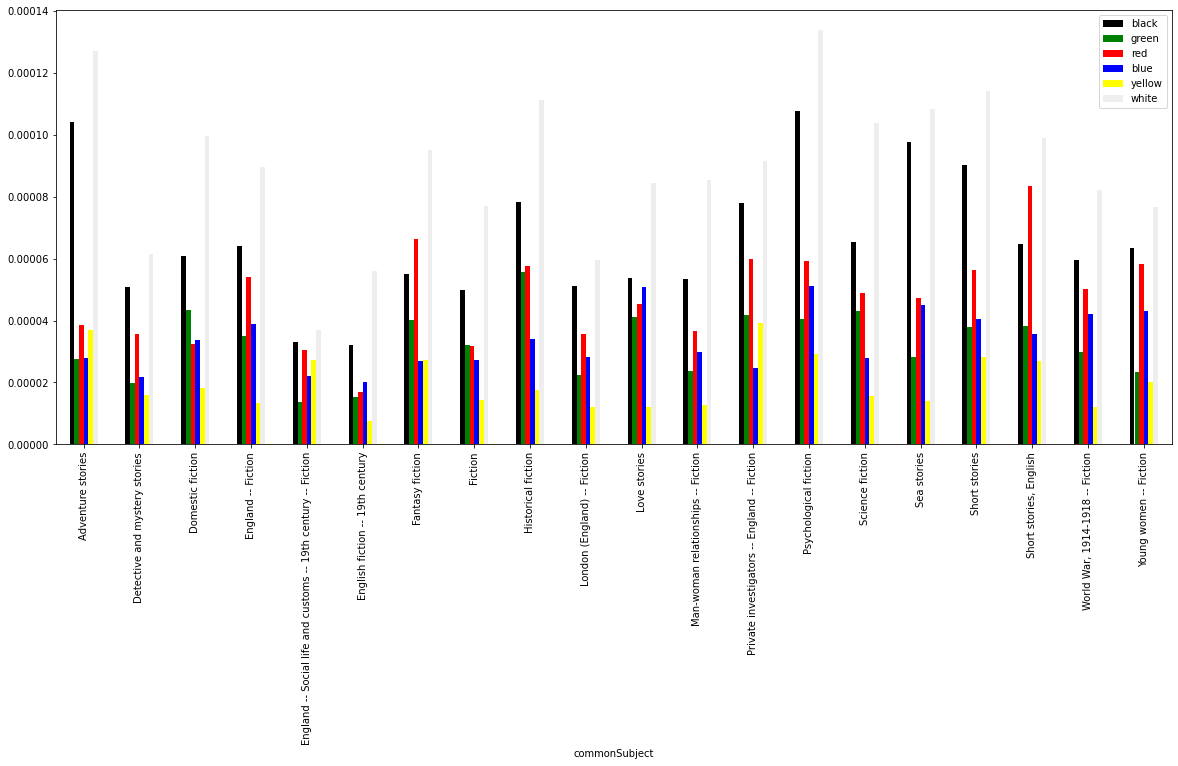

In [38]:
df.groupby('commonSubject').mean()[['black', 'green', 'red', 'blue', 'yellow', 'white']].plot(kind='bar', color=['black', 'green', 'red', 'blue', 'yellow', '#eeeeee'], figsize=(20,8))

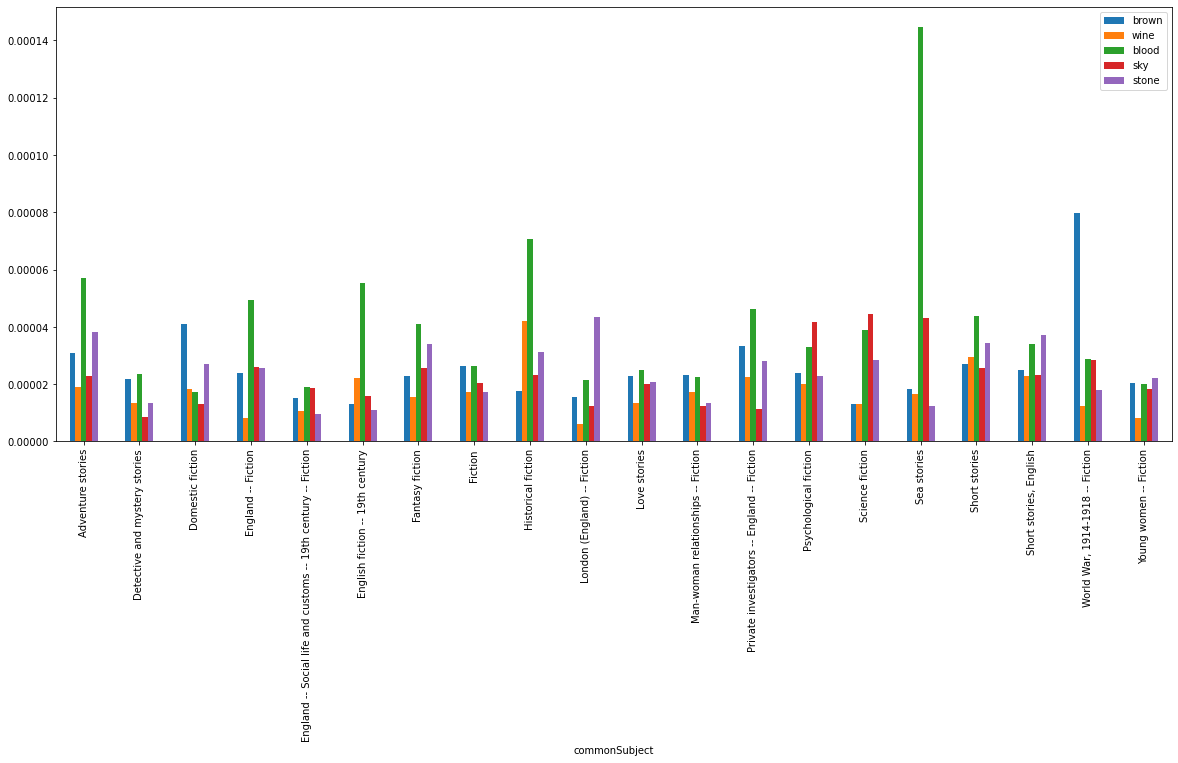

In [39]:
df.groupby('commonSubject').mean()[['brown', 'wine', 'blood', 'sky', 'stone']].plot(kind='bar', figsize=(20,8))

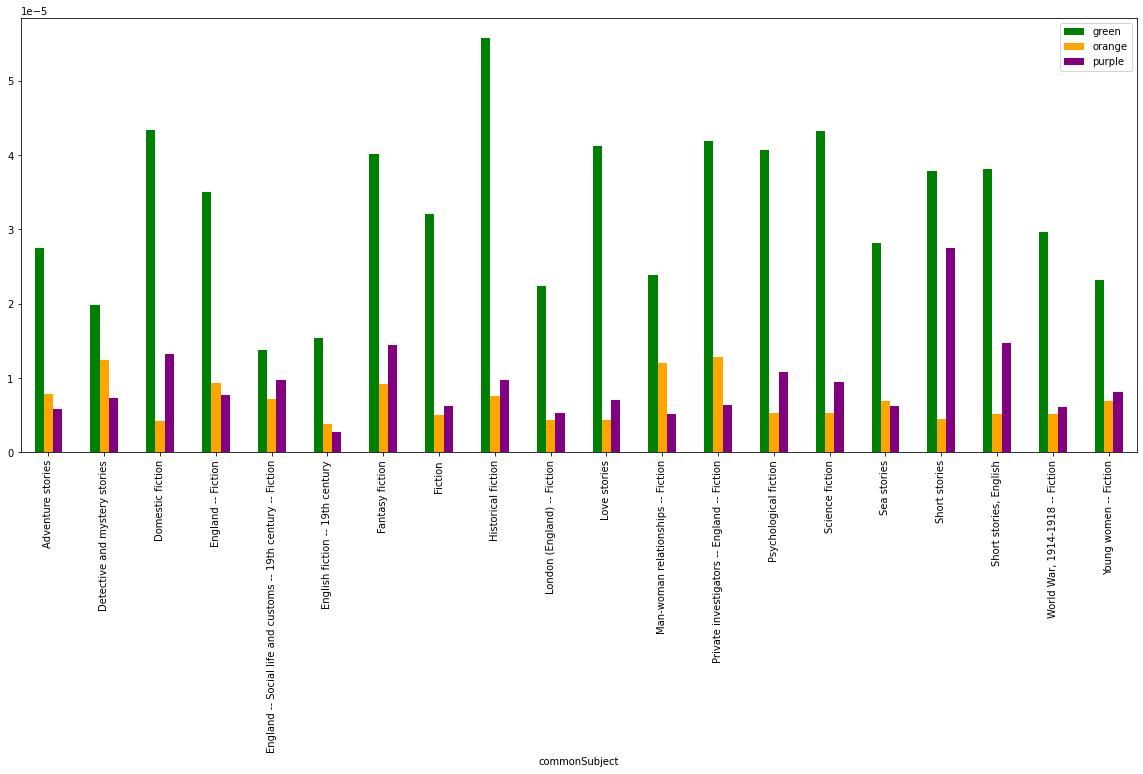

In [40]:
df.groupby('commonSubject').mean()[['green', 'orange', 'purple']].plot(kind='bar', color=['green', 'orange', 'purple'], figsize=(20,8))

In [41]:
stds = df.groupby('commonSubject').mean().std()

In [42]:
df.groupby('commonSubject').mean() 

,black,midnight,dark,royal,chestnut,brown,crimson,forest,blue,russet,...,light salmon,sap green,muddy yellow,pastel blue,light lilac,very dark green,brown yellow,dusky rose,yellow tan,totals
commonSubject,,,,,,,,,,,,,,,,,,,,,
Adventure stories,0.000104,0.000009,0.000078,0.000020,0.000003,0.000031,0.000006,0.000032,0.000028,0.000003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001129
Detective and mystery stories,0.000051,0.000013,0.000057,0.000008,0.000004,0.000022,0.000004,0.000006,0.000022,0.000004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000755
Domestic fiction,0.000061,0.000011,0.000049,0.000006,0.000006,0.000041,0.000011,0.000006,0.000034,NaN,...,NaN,NaN,NaN,NaN,NaN,9.199420e-07,9.199420e-07,NaN,NaN,0.000981
England -- Fiction,0.000064,0.000013,0.000059,0.000010,0.000004,0.000024,0.000010,0.000006,0.000039,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001082
England -- Social life and customs -- 19th century -- Fiction,0.000033,0.000009,0.000048,0.000008,0.000004,0.000015,0.000014,0.000001,0.000022,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000610
English fiction -- 19th century,0.000032,0.000009,0.000037,0.000006,0.000002,0.000013,0.000004,0.000006,0.000020,0.000003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,NaN,0.000636
Fantasy fiction,0.000055,0.000010,0.000061,0.000015,0.000004,0.000023,0.000008,0.000015,0.000027,0.000010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001160
Fiction,0.000050,0.000006,0.000056,0.000015,0.000006,0.000026,0.000006,0.000009,0.000027,0.000004,...,NaN,0.000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000882
Historical fiction,0.000078,0.000008,0.000062,0.000017,0.000004,0.000018,0.000005,0.000071,0.000034,0.000003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001203


In [43]:
stds

black              0.000021
midnight           0.000003
dark               0.000016
royal              0.000007
chestnut           0.000001
                     ...   
very dark green         NaN
brown yellow            NaN
dusky rose              NaN
yellow tan              NaN
totals             0.000243
Length: 450, dtype: float64

In [44]:
means = df.groupby('commonSubject').mean().mean()

In [45]:
bySubject = df.groupby('commonSubject').mean()

In [46]:
positiveOutliers = bySubject[bySubject > (means + stds*2)]
positiveOutliers

,black,midnight,dark,royal,chestnut,brown,crimson,forest,blue,russet,...,light salmon,sap green,muddy yellow,pastel blue,light lilac,very dark green,brown yellow,dusky rose,yellow tan,totals
commonSubject,,,,,,,,,,,,,,,,,,,,,
Adventure stories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Detective and mystery stories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Domestic fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
England -- Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
England -- Social life and customs -- 19th century -- Fiction,NaN,NaN,NaN,NaN,NaN,NaN,0.000014,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
English fiction -- 19th century,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fantasy fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Historical fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000071,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
negativeOutliers = bySubject[bySubject < (means - stds*1.5)]
baseColors = ['black', 'grey', 'brown', 'blue', 'purple', 'red', 'orange', 'green', 'yellow', 'white']
negativeOutliers[baseColors]

,black,grey,brown,blue,purple,red,orange,green,yellow,white
commonSubject,,,,,,,,,,
Adventure stories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Detective and mystery stories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Domestic fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
England -- Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
England -- Social life and customs -- 19th century -- Fiction,0.000033,NaN,NaN,NaN,NaN,NaN,NaN,0.000014,NaN,0.000037
English fiction -- 19th century,0.000032,0.000013,NaN,NaN,NaN,0.000017,NaN,0.000015,NaN,NaN
Fantasy fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Historical fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
positiveOutliers[baseColors]

,black,grey,brown,blue,purple,red,orange,green,yellow,white
commonSubject,,,,,,,,,,
Adventure stories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Detective and mystery stories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Domestic fiction,NaN,0.000073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
England -- Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
England -- Social life and customs -- 19th century -- Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
English fiction -- 19th century,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fantasy fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Historical fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000056,NaN,NaN


In [49]:
df[df['commonSubject'] == 'England -- Social life and customs -- 19th century -- Fiction']['textName']

1881-AyalasAngel-33500                                                            1881-AyalasAngel-33500
1881-TheBlackRobe-1587                                                            1881-TheBlackRobe-1587
1883-HeartandScienceAStoryofthePresentTime-7892          1883-HeartandScienceAStoryofthePresentTime-7892
1883-TheUnclassed-4305                                                            1883-TheUnclassed-4305
1885-ThePayingGuest-4298                                                        1885-ThePayingGuest-4298
1886-APhantomLover-8180                                                          1886-APhantomLover-8180
1886-TheEvilGeniusADomesticStory-1627                              1886-TheEvilGeniusADomesticStory-1627
1886-TheGuiltyRiver-3634                                                        1886-TheGuiltyRiver-3634
1887-Thyrza-4302                                                                        1887-Thyrza-4302
1888-WessexTales-3056                                  

In [50]:
plt.style.use('ggplot')

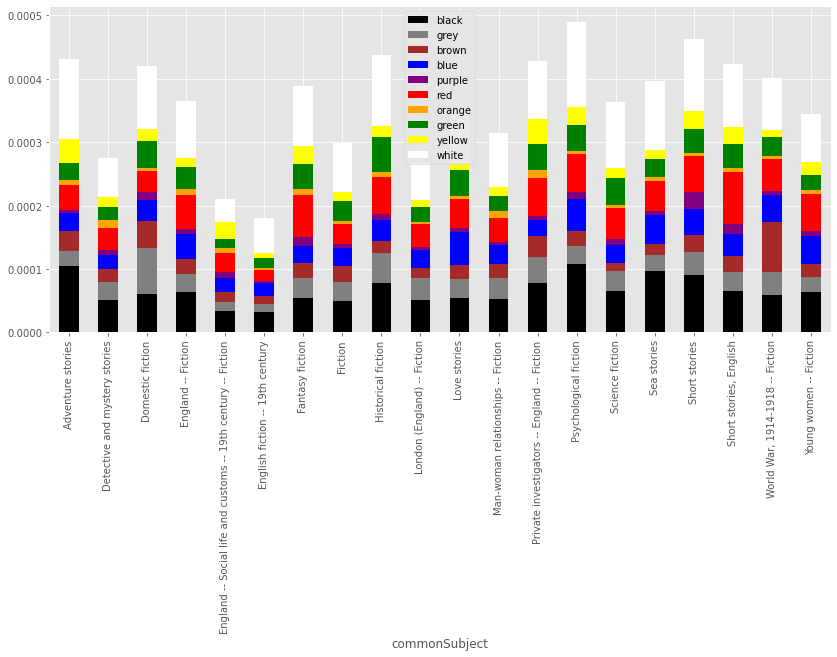

In [51]:
bySubject[baseColors].plot(kind='bar', stacked=True, color=baseColors,figsize=(14,6))

Define colorfulness as the number of color colums which are not NAN. 

In [52]:
bySubject.notna().sum(axis=1).sort_values(ascending=False)

commonSubject
Fiction                                                          265
Love stories                                                     264
Short stories, English                                           215
Psychological fiction                                            206
Detective and mystery stories                                    206
London (England) -- Fiction                                      203
Adventure stories                                                203
England -- Fiction                                               196
World War, 1914-1918 -- Fiction                                  193
Domestic fiction                                                 192
Short stories                                                    187
Man-woman relationships -- Fiction                               185
Science fiction                                                  180
Fantasy fiction                                                  176
Historical fiction  

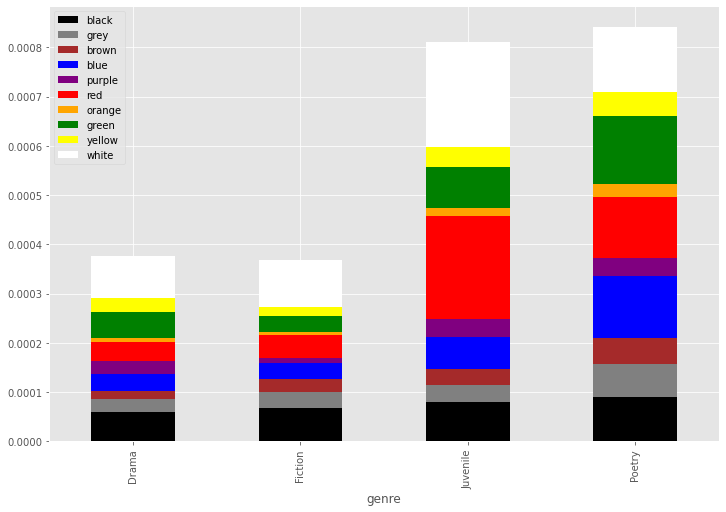

In [53]:
df.groupby('genre').mean()[baseColors].plot(kind='bar', stacked=True, color=baseColors, figsize=(12,8))

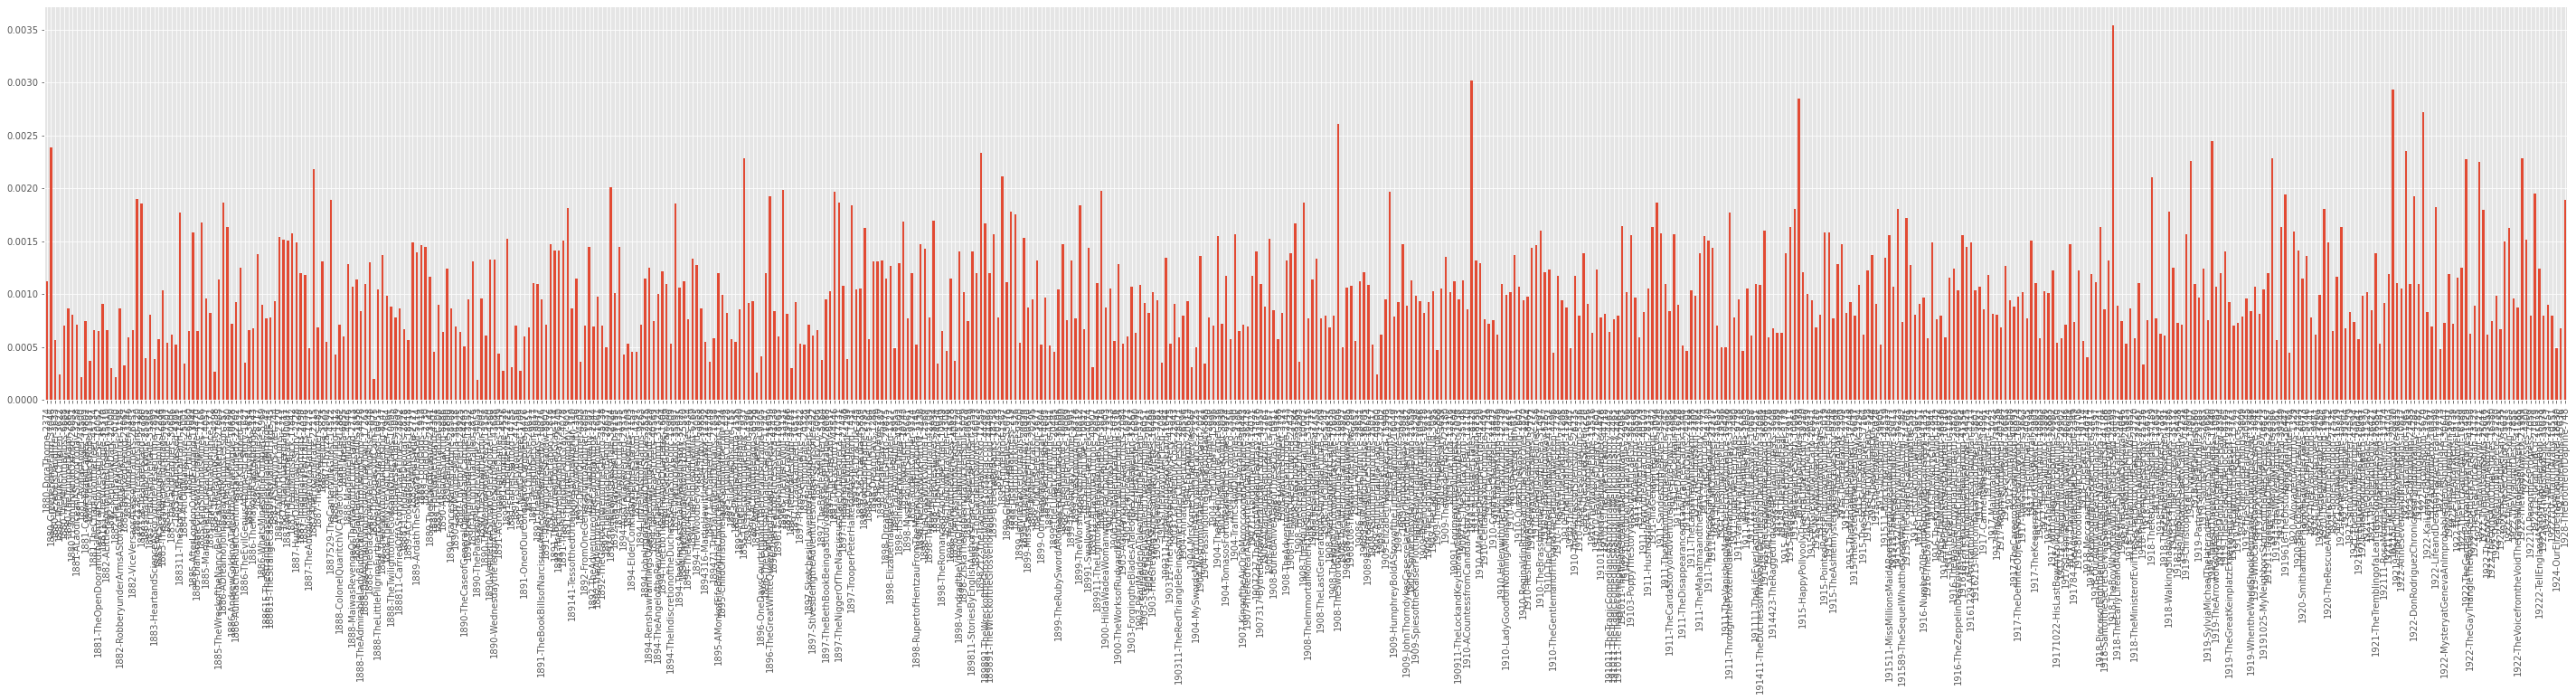

In [54]:
df[df['genre'] == 'Fiction']['totals'].plot(kind='bar', figsize=(50,8))

In [55]:
fictionTotals = df[df['genre'] == 'Fiction']['totals']

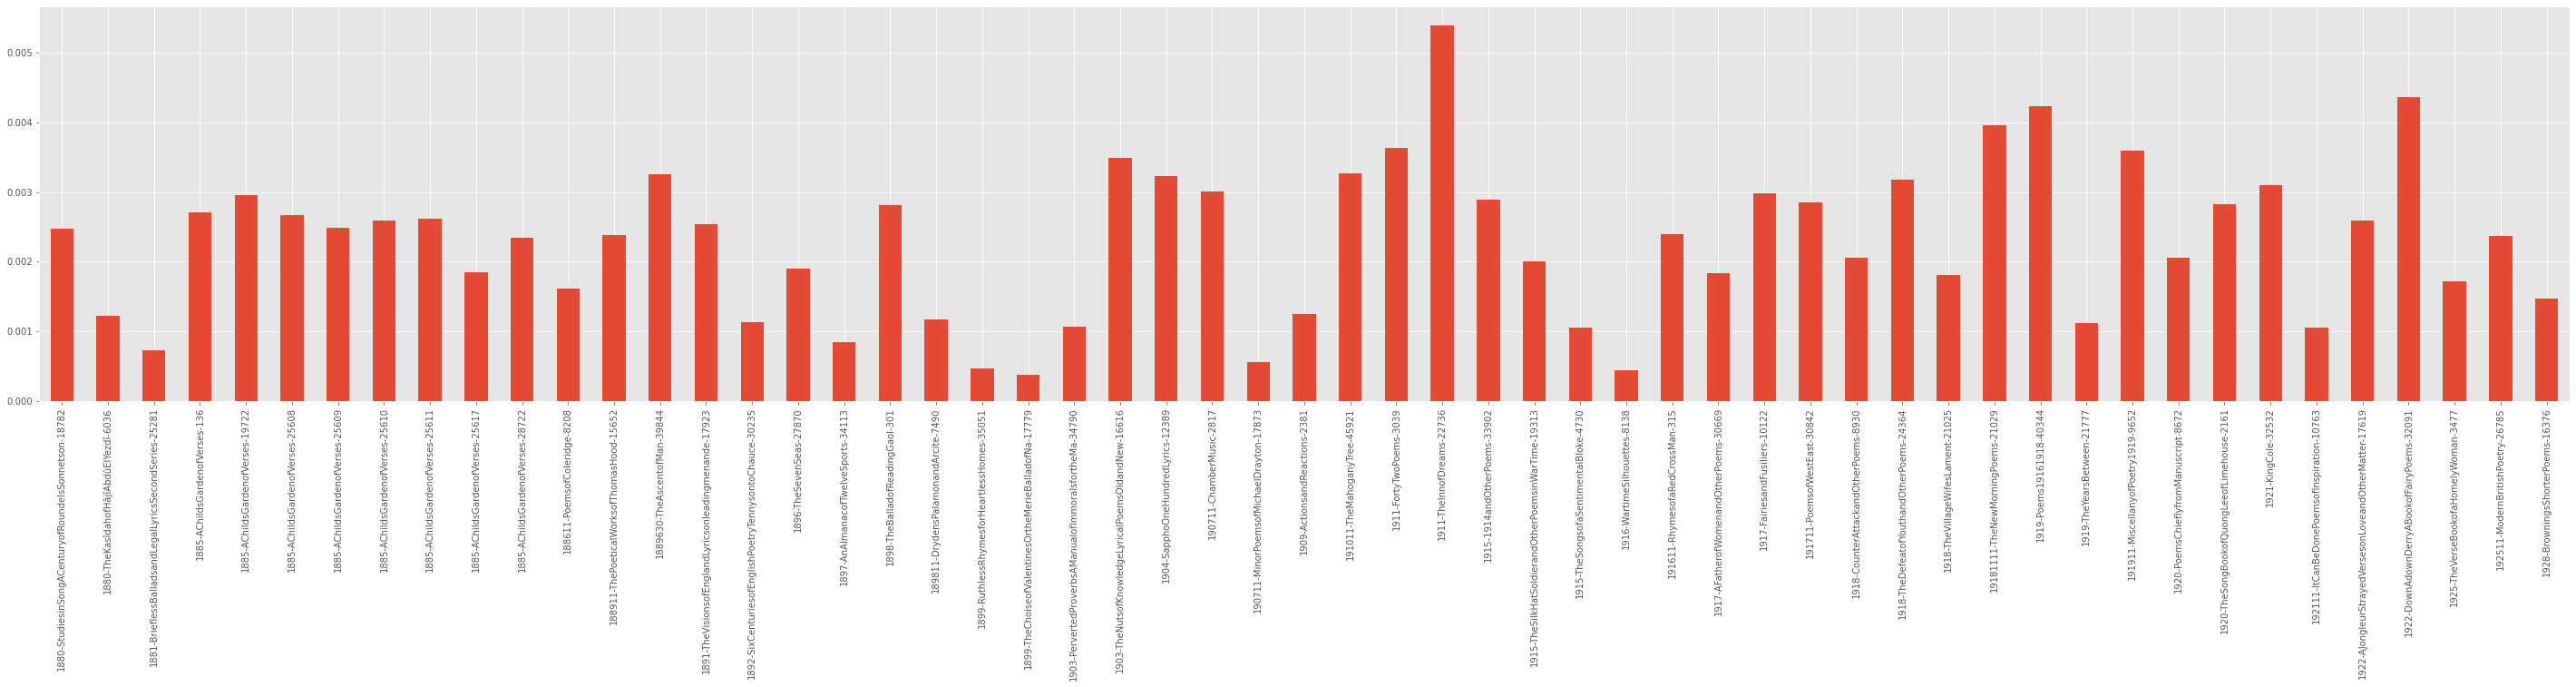

In [56]:
df[df['genre'] == 'Poetry']['totals'].plot(kind='bar', figsize=(50,8))

In [57]:
df['year'] = df['textName'].str[:4]
df['year'] = df['year'].apply(int)
df['totals'] = df['totals'].apply(float)

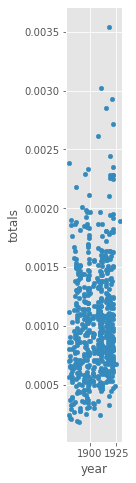

In [58]:
df[df['genre'] == 'Fiction'].plot(kind='scatter', x='year', y='totals', figsize=(1,8))

In [99]:
sums = df.sum(axis=1)
years = sums.index.str.slice(0,4)
sumsYears = pd.Series(list(sums), index=years)
fig = px.scatter(sumsYears)
fig.show()

In [59]:
sns.set(rc={'figure.figsize':(16,8)})


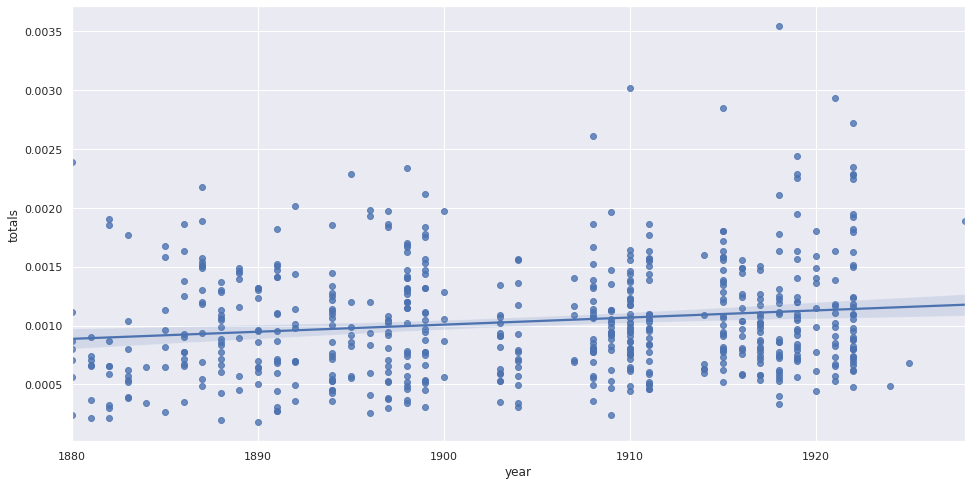

In [60]:
sns.regplot(x='year', y='totals', data=df[df['genre']=='Fiction'])

In [61]:
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot

# regress "expression" onto "motifScore" (plus an intercept)
model = sm.OLS(l.expression, sm.add_constant(motif.motifScore))

# scatter-plot data
ax = motif.plot(x='motifScore', y='expression', kind='scatter')

# plot regression line
abline_plot(model_results=model.fit(), ax=ax)

NameError: name 'l' is not defined

In [ ]:
df[df['genre'] == 'Fiction'][baseColors].plot(kind='box', figsize=(16,8))

In [ ]:
fiction = df[df['genre'] == 'Fiction']

In [ ]:
df['totals'].std() 

## Fiction outliers 

In [ ]:
fictionPositiveOutliers = fiction['totals'][fiction['totals'] > fiction['totals'].mean() + fiction['totals'].std() * 2]

Most of these are post 1910. 

In [ ]:
fictionPosOutliersDf = pd.DataFrame(fictionPositiveOutliers)

In [ ]:
fictionPosOutliersDf['name'] = fictionPosOutliersDf.index

In [ ]:
def getAuthor(textName):
    textId = textName.split('-')[-1]
    c.execute('select author from meta where id=?', [str(float(textId))])
    return c.fetchone()[0]

In [ ]:
[getAuthor(item) for item, val in fictionPositiveOutliers.items()]

In [ ]:
fictionPosOutliersDf['Author'] = fictionPosOutliersDf['name'].apply(getAuthor)

In [ ]:
export = fictionPosOutliersDf.sort_values(by='totals', ascending=False)[['Author', 'totals']]

In [ ]:
export.to_html('fiction-positive-outliers-table.html')